In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from utils import find_the_elbow, regression_model_selection, build_regression_model, evaluate_regression_model, classifier_model_selection, build_classifier_model, evaluate_classifier_model

In [2]:
df = pd.read_csv('Data/processed_data.csv', encoding='utf-8')

df = df.astype({'CANCELLED': object, 'DIVERTED': object,
                'BEGINNING_OF_OUTBREAK': object})

In [3]:
for feature in df.columns:
    if df[feature].dtype == 'O':
        df[feature] = df[feature].astype('category').cat.codes

In [4]:
path = 'results'
if not os.path.exists(os.path.join(path)):
    os.mkdir(path)

## Regression

In [5]:
X = df.loc[:, df.columns.drop(['CANCELLED', 'TOTAL_DELAY'])]
y = df.loc[:, 'TOTAL_DELAY']

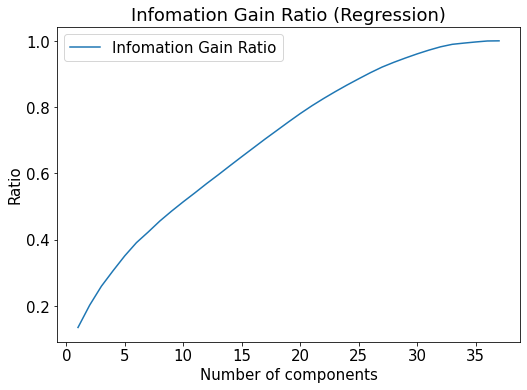

In [6]:
find_the_elbow(X,
               figsize=(8.3, 5.8),
               title='Infomation Gain Ratio (Regression)',
               save=True,
               path='./imgs',
               show=True)

In [7]:
models = [LinearRegression(),
          Ridge(random_state=0),
          Lasso(random_state=0)]

results = []
for model in tqdm(models):
    print(f'Validating {model}..')
    result = regression_model_selection(X, y, model)
    result['model'] = model
    results.append(result)
regression_cross_validation = pd.DataFrame(results).set_index('model')
csv_path = os.path.join(path, 'regression_cross_validation.csv')
regression_cross_validation.to_csv(csv_path)
regression_cross_validation

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Validating LinearRegression()..


 33%|████████████████████████████                                                        | 1/3 [00:23<00:46, 23.09s/it]

Validating Ridge(random_state=0)..


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:39<00:21, 21.00s/it]

Validating Lasso(random_state=0)..


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:58<00:00, 19.46s/it]


,fit_time,score_time,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_r2
model,,,,,
LinearRegression(),4.33548+-0.05042,0.20358+-0.0173,-424.86979+-169.6886,-20.21288+-4.03847,0.03918+-0.0151
Ridge(random_state=0),2.93292+-0.04968,0.21398+-0.01846,-424.86979+-169.6886,-20.21288+-4.03847,0.03918+-0.0151
Lasso(random_state=0),3.54185+-0.06707,0.21268+-0.01845,-432.11711+-177.53857,-20.36155+-4.18619,0.02727+-0.00563


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [9]:
ridge = build_regression_model(estimator=Ridge(random_state=0),
                               model_name='Ridge',
                               X_train=X_train,
                               y_train=y_train,
                               save=True,
                               path='./models')

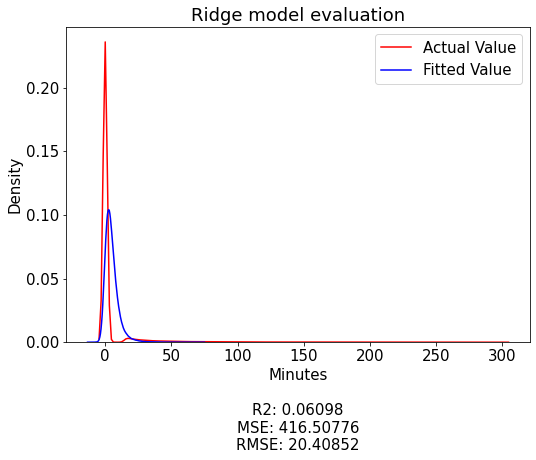

In [10]:
evaluate_regression_model(model=ridge,
                          X_test=X_test,
                          y_test=y_test,
                          figsize=(8.3, 5.8),
                          title='Ridge model evaluation',
                          save=True,
                          path='./imgs',
                          show=True)

## Classification

In [11]:
X = df.loc[:, df.columns.drop(['CANCELLED'])]
y = df.loc[:, 'CANCELLED']

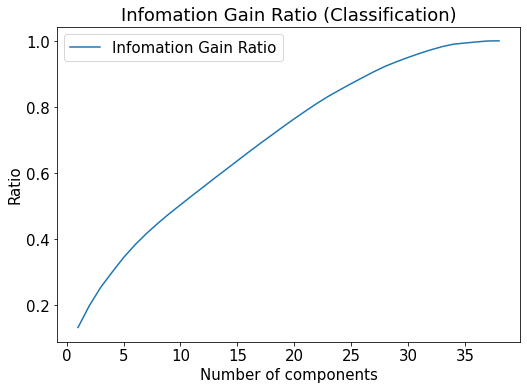

In [12]:
find_the_elbow(X,
               figsize=(8.3, 5.8),
               title='Infomation Gain Ratio (Classification)',
               save=True,
               path='./imgs',
               show=True)

In [13]:
models = [LogisticRegression(random_state=0),
          BernoulliNB(),
          DecisionTreeClassifier(criterion='entropy', random_state=0)]

results = []
for model in tqdm(models):
    print(f'Validating {model}..')
    result = classifier_model_selection(X, y, model)
    result['model'] = model
    results.append(result)
classification_cross_validation = pd.DataFrame(results).set_index('model')
csv_path = os.path.join(path, 'classification_cross_validation.csv')
classification_cross_validation.to_csv(csv_path)
classification_cross_validation

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Validating LogisticRegression(random_state=0)..


C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 33%|████████████████████████████                                                        | 1/3 [01:29<02:59, 89.98s/it]

Validating BernoulliNB()..


 67%|████████████████████████████████████████████████████████                            | 2/3 [01:53<01:09, 69.99s/it]

Validating DecisionTreeClassifier(criterion='entropy', random_state=0)..


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:34<00:00, 91.62s/it]


,fit_time,score_time,test_recall,test_precision,test_accuracy,test_f1
model,,,,,,
LogisticRegression(random_state=0),17.16316+-1.84485,0.67291+-0.03999,0.17599+-0.32734,0.4676+-0.42596,0.83507+-0.18145,0.05691+-0.06963
BernoulliNB(),3.63972+-0.03834,0.8906+-0.05945,0.43269+-0.23865,0.66543+-0.41127,0.80936+-0.22701,0.3486+-0.15436
"DecisionTreeClassifier(criterion='entropy', random_state=0)",31.51297+-4.1908,0.65667+-0.04031,0.26323+-0.36996,0.4206+-0.4737,0.5376+-0.33294,0.08286+-0.07389


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)

In [15]:
naive_bayes = build_classifier_model(estimator=BernoulliNB(),
                                     model_name='Naive Bayes',
                                     X_train=X_train,
                                     y_train=y_train,
                                     save=True,
                                     path='./models')

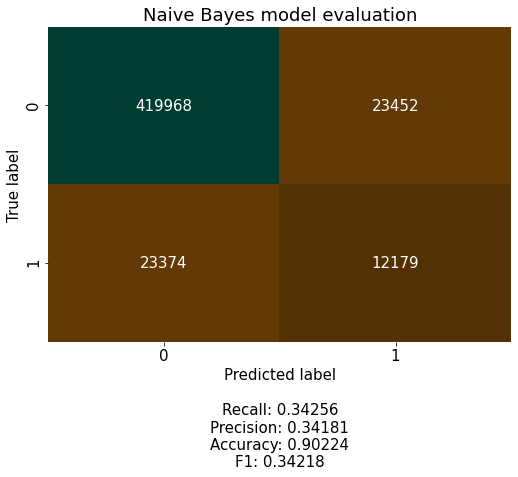

In [16]:
evaluate_classifier_model(model=naive_bayes,
                          X_test=X_test,
                          y_test=y_test,
                          figsize=(8.3, 5.8),
                          title='Naive Bayes model evaluation',
                          save=True,
                          path='./imgs',
                          show=True)